### Project Details ###
Your tasks in this project are as follows:

1. [Data wrangling, which consists of](#data_wrangling)
    - [Gathering data](#gathering)
        - The WeRateDogs Twitter archive - twitter_archive_enhanced.csv
        - The tweet image predictions - image_predictions.tsv
        - Query the Twitter API for each tweet's JSON data and store in a file called tweet_json.txt file
    - [Assessing data](#assessing)
        - eight (8) quality issues
        - two (2) tidiness issues
    - [Cleaning data](#cleaning)
    
    
2. [Storing, analyzing, and visualizing your wrangled data](#stor_anal_viz)


3. [Reporting on](#reporting)
    - your data wrangling efforts 
    - your data analyses and visualizations

**Notes to delete**
- ratings propably arent all correct
- dog names may not be correct
- dog stages may not be correct (i.e. doggo, floofer, pupper, and puppo)
- rows should be 2356

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned.
- You do not need to gather the tweets beyond August 1st, 2017. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import os
import seaborn as sn
%matplotlib inline

<a id='data_wrangling'></a>

### Data wrangling

<a id='gathering'></a>

#### Gathering data
Gather each of the three pieces of data for this project

In [2]:
# 1. Gather the WeRateDogs Twitter archive - twitter_archive_enhanced.csv
twit_arch = pd.read_csv('data/twitter-archive-enhanced.csv') # this file is located locally and loaded into dataframe

In [3]:
# 2. Gather the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each
# tweet. This file (image_predictions.tsv) is hosted on Udacity's servers at the following URL.
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url).content.decode('utf-8') # decodes the given bytes response into text
image_pred = pd.read_csv(io.StringIO(response), sep="\t") # loaded into dataframe

In [4]:
# 3. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using
# Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

file_name = 'tweet_json.txt' # save JSON in a text file

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twit_arch.tweet_id.values

def query_twitter(file_name, tweet_ids) :
    """Queries Twitter's API for JSON data for each tweet ID in the Twitter archive
    and writes that data to a text file name file_name
    
    Keyword arguments:
    file_name -- name of the text file to write to
    tweet_ids -- list of tweet ids to query
    """
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open(file_name, 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)
    
# Query API if output text file i.e. 'tweet_json.txt' doesn't already exist in local
if not os.path.exists(file_name):
        query_twitter(file_name, tweet_ids)
else:
    print(f'file {file_name} already exists')
    # Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID,
    # retweet count, and favorite count.
    df_list = []
    with open(file_name, 'r', encoding='utf-8') as file:
        for line in file:
            line_dict = json.loads(line) # convert JSON line to dict
            tweet_id = line_dict['id']
            retweet_count = line_dict['retweet_count']
            favorite_count = line_dict['favorite_count']
            df_list.append({'tweet_id': tweet_id, # append dict to df_list
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
tweet_df = pd.DataFrame(df_list, columns= ['tweet_id','retweet_count', 'favorite_count']) # load list of dicts into dataframe
print(f'file {file_name} imported as dataframe "tweet_df"')

file tweet_json.txt already exists
file tweet_json.txt imported as dataframe "tweet_df"


<a id='assessing'></a>

#### Assessing data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [5]:
# visually inspect the dataframe
twit_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twit_arch.shape

(2356, 17)

In [7]:
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twit_arch.describe()[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [9]:
# So I know the numerator can have an extragrated value yet it was also mentioned the rating may not all be correct so
# lets assume the denominator has to be 10 for a correct rating and lets find those rows where the denominator is not
# 10 to investigate later
pd.set_option('display.max_colwidth', -1) # this helps to view the full text field in dataframe
deno_not_ten = twit_arch[twit_arch.rating_denominator != 10][['text','rating_numerator','rating_denominator']]
print(len(deno_not_ten),"- rows where the denominator is not 10, so could be errors. Will inspect later")

23 - rows where the denominator is not 10, so could be errors. Will inspect later


In [10]:
# It was also mentioned that we only want original ratings (no retweets) that have images. Though there are 5000+
# tweets in the dataset, not all are dog ratings and some are retweets so let's capture them
retweets = twit_arch[twit_arch.text.str.contains('RT')]
print(len(retweets), "rows that contain RT ie retweets")

192 rows that contain RT ie retweets


In [11]:
# visually inspect the dataframe
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
image_pred.shape

(2075, 12)

In [13]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
pred_no_dog = image_pred[(image_pred['p1_dog'] == False)&(image_pred['p2_dog'] == False)&(image_pred['p3_dog'] == False)]
print(len(pred_no_dog), "tweets predicted to not be dogs")

324 tweets predicted to not be dogs


In [16]:
# visually inspect the dataframe
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [17]:
tweet_df.shape

(2354, 3)

In [18]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


##### eight (8) quality issues
issues with content or dirty data

**twit_arch(twitter_archive_enhanced.csv)**
- `in_reply_to_status_id` and `in_reply_to_user_id` columns are mostly blank and contain low value data
- since `twit_arch.source` column is very complete we can clean up the values to be more readable
- `retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp` appears to indicate those rows/tweets that are retweets
- see also ~192 rows that could be retweets `twit_arch[twit_arch.text.str.contains('RT')]`
- looked into `twit_arch.rating_numerator` even though I know the values are arbitrary and saw via `twit_arch.rating_numerator.value_counts()` two dogs with a zero score. Thought every dog would at least get a score and these were errors. Nope, confirmed via text fields these were scored zeros, poor dogs. Per instructions "the fact that the rating numerators are greater than the denominators does not need to be cleaned" so I didnt worry any more about this column.
- `twit_arch.rating_denominator` has values that are not 10. Could be errors and will inspect later
- `twit_arch.name.value_counts()` shows the prevalence of 745 dogs named 'None' and 55 named 'a'
- `twit_arch[twit_arch.name.str.islower()][['text','name']]` shows some incorrect lowercase names that need to be addressed

**image_pred(image_predictions.tsv)**
- this data is pretty clean but it was noticed that only 2075 rows exist whereas we have 2356 rows of tweets

**tweet_df(twitter API)**
- this data is clean but only 2354 tweets came back with data vs the 2356 tweet ids that were submitted to the API

##### (2) tidiness issues

 issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.

**twit_arch(twitter_archive_enhanced.csv)**
- set `tweet_id` to string and reset as index
- `in_reply_to_status_id` and `in_reply_to_user_id` columns are low value and need to be dropped
- recast `timestamp` column from object to timestamp
- use `retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp` to select RTs rows to drop
- reencode dog stages (doggo, floofer, pupper, puppo) as dog stages column

**image_pred(image_predictions.tsv)**
- set `tweet_id` to string and reset as index
- after merging with twit_arch dataframe on `tweet_id` we can filter out those rows with high confidence of not being a dog. Roughly 324 tweets/rows are predicted to not be dogs.

**tweet_df(twitter API)**
- set `tweet_id` to string and reset as index
- merge retweet count and favorite count into `twit_arch`
- after merging with twit_arch dataframe on `tweet_id` we can drop those rows with no retweet_count or	favorite_count values

<a id='cleaning'></a>

#### Cleaning data
Clean each of the issues you documented while assessing. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

The programmatic data cleaning process:

- **Define**: convert our assessments into defined cleaning tasks. These definitions also serve as an instruction list so others (or yourself in the future) can look at your work and reproduce it.
- **Code**: convert those definitions to code and run that code.
- **Test**: test your dataset, visually or with code, to make sure your cleaning operations worked.
Always make copies of the original pieces of data before cleaning!

**twit_arch(twitter_archive_enhanced.csv)**

In [20]:
# Make a copy of the dataframe twit_arch(twitter_archive_enhanced.csv)
twit_arch_df = twit_arch.copy()

In [21]:
# Define: in_reply_to_status_id and in_reply_to_user_id columns are mostly blank and contain low value data
# so lets drop them

# Code:
drop_cols = ['in_reply_to_status_id','in_reply_to_user_id']
twit_arch_df.drop(columns= drop_cols, inplace=True)

# Test:
assert len([cols for cols in drop_cols if cols in twit_arch_df.columns]) == 0


In [22]:
# Define: reset tweet_id as index

# Code:
ids = twit_arch_df.tweet_id
twit_arch_df.set_index('tweet_id', inplace=True)

# Test:
assert len([item for item in ids if item not in twit_arch_df.index.values]) == 0


In [23]:
# Define: recast timestamp column from object to timestamp

# Code:
twit_arch_df['timestamp'] = pd.to_datetime(twit_arch_df.timestamp.str[:10], format='%Y-%m-%d')

# Test:
assert twit_arch_df.timestamp.dtypes == '<M8[ns]'


In [24]:
# Define: since twit_arch.source column is very complete we can clean up the values to be more readable

# Code:
new_values = ['iphone', 'web', 'vine', 'tweetdeck']
twit_arch['source'] = twit_arch.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',new_values[0])
twit_arch['source'] = twit_arch.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',new_values[1])
twit_arch['source'] = twit_arch.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',new_values[2])
twit_arch['source'] = twit_arch.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',new_values[3])

# Test:
assert new_values in twit_arch.source.unique()


In [25]:
# Define: see also ~192 rows that could be retweets `twit_arch[twit_arch.text.str.contains('RT')]`.
# We want to drop them

# Code:
retweets = twit_arch_df[twit_arch_df.text.str.contains('RT')]
pre_count = len(twit_arch_df)
twit_arch_df.drop(retweets.index, axis=0, inplace=True)

# Test:
assert pre_count - len(retweets) == len(twit_arch_df)


In [26]:
# Define: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp appears to indicate those
# rows/tweets that are retweets and are now all NaNs since we dropped the retweet rows so lets drop those columns

# Code:
drop_cols = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twit_arch_df.drop(columns= drop_cols, inplace=True)

# Test:
assert len([cols for cols in drop_cols if cols in twit_arch_df.columns]) == 0


In [27]:
# Define: reencode dog stages (doggo, floofer, pupper, puppo) columns into a single column titled 'stage'

# Code:
# # Tried to use melt like so but couldnt get it to work as it was resulting in extra rows so I tried a more manual way..
# id_vars=["tweet_id","timestamp","source","text","expanded_urls","rating_numerator","rating_denominator","name"]
# pd.melt(twit_arch_df, id_vars=id_vars, var_name='stage')

# Combine the columns
twit_arch_df['stage'] = twit_arch_df['doggo'] + twit_arch_df['floofer'] + twit_arch_df['pupper'] + twit_arch_df['puppo']
# Grab resulting values
keys = sorted(twit_arch_df['stage'].unique())
# Create list of new values and zip it into a dict
values = ['None','puppo','pupper','floofer','doggo','doggo-puppo','doggo-pupper','doggo-floofer']
new_vals = dict(zip(keys, values))
# Replace the new values based on the dict
twit_arch_df.replace({'stage': new_vals}, inplace=True)
# Drop the individual stage columns 'doggo','floofer','pupper','puppo'
drop_cols = ['doggo','floofer','pupper','puppo']
twit_arch_df.drop(columns= drop_cols, inplace=True)

# Test:
assert len([cols for cols in drop_cols if cols in twit_arch_df.columns]) == 0


In [28]:
twit_arch_df.stage.value_counts()
# We can fix these stages now but after investigating manually it seems some of the error is caused by tweets that do
# not have dogs in them so lets wait till we merge this df to the predictions to see if we cannot weed out more 
# non-dogs before having to manually look into and change these doggo-floofer, doggo-puppo, doggo-pupper as
# well as the None values.

None             1822
pupper           223 
doggo            74  
puppo            24  
doggo-pupper     10  
floofer          9   
doggo-floofer    1   
doggo-puppo      1   
Name: stage, dtype: int64

In [29]:
# Make a copy of the dataframe image_pred(image_predictions.tsv)
image_pred_df = image_pred.copy()

In [30]:
# Define: and set tweet_id to string and reset as index

# Code:
ids = image_pred_df.tweet_id
image_pred_df.set_index('tweet_id', inplace=True)

# Test:
assert len([item for item in ids if item not in image_pred_df.index.values]) == 0


In [31]:
# Make a copy of the dataframe tweet_df(twitter API)
tweet_df2 = tweet_df.copy()

In [32]:
# Define: reset tweet_id as index

# Code:
ids = tweet_df2.tweet_id
tweet_df2.set_index('tweet_id', inplace=True)

# Test:
assert len([item for item in ids if item not in tweet_df2.index.values]) == 0


In [33]:
twit_arch_df.shape

(2164, 8)

In [34]:
image_pred_df.shape

(2075, 11)

In [35]:
tweet_df2.shape

(2354, 2)

In [36]:
# Merge image_pred_df into twit_arch_df
df = pd.DataFrame()
df = twit_arch_df.merge(image_pred_df, how='left', left_index=True, right_index=True)

In [37]:
# Merge tweet_df2 into df 
df = df.merge(tweet_df2, how='left', left_index=True, right_index=True)
df.head(1)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8853,39467


In [38]:
df.shape

(2164, 21)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 892420643555336193 to 666020888022790149
Data columns (total 21 columns):
timestamp             2164 non-null datetime64[ns]
source                2164 non-null object
text                  2164 non-null object
expanded_urls         2106 non-null object
rating_numerator      2164 non-null int64
rating_denominator    2164 non-null int64
name                  2164 non-null object
stage                 2164 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null float64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null object
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null object
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null object
retweet_count         2164 non-null

In [40]:
# Define: after merging all the dataframes together we can filter out those rows with high confidence
# of not being a dog with that explained below..

# selecting those rows where the `p1_dog` thru `p3_dog` values reflecting #1 prediction is a breed of dog to be False
# based on the n number of pics avaiable and the p1_conf is greater than the mean of p1_conf

# Code:
no_dogs = df[(df.p1_dog == False) & (df.p2_dog == False) & (df.p3_dog == False) & (df.p1_conf > df.p1_conf.mean())]
pre_count = len(df)
df.drop(no_dogs.index, axis=0, inplace=True)

# Test:
assert pre_count - len(no_dogs) == len(df)

In [41]:
# Define: after merging with twit_arch dataframe on `tweet_id` we can drop those rows with no retweet_count or
# favorite_count values but after merging and dropping non-dogs those rows without retweets and favorite counts
# dropped as well

# Code:
df.info()

# Test:
assert df.retweet_count.dtypes == df.favorite_count.dtypes == 'int64'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 892420643555336193 to 666020888022790149
Data columns (total 21 columns):
timestamp             2043 non-null datetime64[ns]
source                2043 non-null object
text                  2043 non-null object
expanded_urls         1985 non-null object
rating_numerator      2043 non-null int64
rating_denominator    2043 non-null int64
name                  2043 non-null object
stage                 2043 non-null object
jpg_url               1865 non-null object
img_num               1865 non-null float64
p1                    1865 non-null object
p1_conf               1865 non-null float64
p1_dog                1865 non-null object
p2                    1865 non-null object
p2_conf               1865 non-null float64
p2_dog                1865 non-null object
p3                    1865 non-null object
p3_conf               1865 non-null float64
p3_dog                1865 non-null object
retweet_count         2043 non-null

At this point we've accomplished most of the tidiness and quality issues but there's some minor ones listed below we can take care of now:

- strip whitespace from df.expanded_urls and df.jpg_url
- resolve lower case df.name
- resolve None as name
- resolve the 9 doggo-pupper, 1 doggo-floofer and 1 doggo-puppo values in df.stage col
- lower capitalize cols p3, p2, p1, stage, name


In [42]:
# Define: strip whitespace from both ends of df.expanded_urls and df.jpg_url

# Code:
df['expanded_urls'] = df.expanded_urls.str.strip()
df['jpg_url'] = df.jpg_url.str.strip()

df[['expanded_urls','jpg_url']][:3]

,expanded_urls,jpg_url
tweet_id,,
892420643555336193,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
892177421306343426,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
891815181378084864,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg


In [43]:
# Define: resolve lower case df.name
lower_case_names = df[df.name.str.islower() == True]
print("So there's",len(lower_case_names),"lower case dogs names")
# these lower case dog names could indicate tweets that are not dogs..
no_dogs_preds = lower_case_names[(lower_case_names.p1_dog == False)&(lower_case_names.p2_dog == False)&(lower_case_names.p3_dog == False)]
print("and",len(no_dogs_preds),"out of the 99 predicted based on the images available to not be a dog breed")


So there's 99 lower case dogs names
and 13 out of the 99 predicted based on the images available to not be a dog breed


So we wont remove or worry about these lowercase dog names for now as it's now starting to become a judgement call on how accurate you want all these rows to truly be dogs. If this was a real project and the highest level of accuracte was needed it would be at this point that I would start to manually check and change the values because the remaining of errors in the dog names are due to either parsing errors, a dog name not provided in tweet, or it not being a dog so I would discuss further how important it was to have a dog name to then decide how to proceed but for now we've identified them and will leave them in place.

In [44]:
# Define: resolve lower case df.name
no_names = df[df.name == 'None']
print(len(no_names),"dogs with None as name from what appears to be lack of name provided in tweet")


623 dogs with None as name from what appears to be lack of name provided in tweet


This like the point above would trigger me to discuss with the stakeholder the importance of having the name value in any downstream analysis. If it was important then I would use the prediction data on the dogs names with 'None' to see if I could not identify a subset based on favorable predictions that could likely be dogs to explore manually and extract the names if present ie salvage as much as I can. If having names isnt that valuable then I would just drop the 623.

On second though let's just drop those rows with lower case names and dog name of 'None'.

In [45]:
# Define: after merging all the dataframes together we can filter out those rows with high confidence
# of not being a dog with that explained below..

# selecting those rows where the `p1_dog` thru `p3_dog` values reflecting #1 prediction is a breed of dog to be False
# based on the n number of pics avaiable and the p1_conf is greater than the mean of p1_conf

# Code:
lower_case_names = df[df.name.str.islower() == True]
no_names = df[df.name == 'None']
pre_count = len(df)
df.drop(lower_case_names.index, axis=0, inplace=True)
df.drop(no_names.index, axis=0, inplace=True)


# Test:
assert pre_count - (len(lower_case_names)+len(no_names)) == len(df)

In [46]:
df.stage.value_counts()
# So dropping a lot of those inconsistent rows also led to the removal of some of the double encoded stage values
# we still have some Nones as well as 3 doggo-pupper so lets manually take care of the 3 doggo-puppers

None            1152
pupper          110 
doggo           35  
puppo           16  
floofer         5   
doggo-pupper    3   
Name: stage, dtype: int64

In [47]:
df[df.stage == 'doggo-pupper'].index

Int64Index([817777686764523521, 801115127852503040, 759793422261743616], dtype='int64', name='tweet_id')

In [48]:
# Define: resolve the 3 doggo-puppers

# Code:
df.loc[817777686764523521,'stage'] = 'pupper'
df.loc[801115127852503040,'stage'] = 'doggo'
df.loc[759793422261743616,'stage'] = 'doggo'
df.stage.value_counts()


# Test:
assert df.stage.value_counts().index.contains('doggo-pupper') == False

In [49]:
# Define: lower capitalize cols p3, p2, p1, stage, name

# Code:
df['p3'] = df.p3.str.lower()
df['p2'] = df.p2.str.lower()
df['p1'] = df.p1.str.lower()
df['stage'] = df.stage.str.lower()
df['name'] = df.name.str.lower()


# Test:
assert df.p3.str.islower().all() == df.p2.str.islower().all() == df.p1.str.islower().all() == df.name.str.islower().all() ==df.stage.str.islower().all() == True

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 892420643555336193 to 666418789513326592
Data columns (total 21 columns):
timestamp             1321 non-null datetime64[ns]
source                1321 non-null object
text                  1321 non-null object
expanded_urls         1321 non-null object
rating_numerator      1321 non-null int64
rating_denominator    1321 non-null int64
name                  1321 non-null object
stage                 1321 non-null object
jpg_url               1281 non-null object
img_num               1281 non-null float64
p1                    1281 non-null object
p1_conf               1281 non-null float64
p1_dog                1281 non-null object
p2                    1281 non-null object
p2_conf               1281 non-null float64
p2_dog                1281 non-null object
p3                    1281 non-null object
p3_conf               1281 non-null float64
p3_dog                1281 non-null object
retweet_count         1321 non-null

<a id='stor_anal_viz'></a>

### Storing, analyzing, and visualizing 

#### Storing
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately.

In [51]:
df.to_csv('twitter_archive_master.csv.', index=False)

#### Analyzing and visualizing
At least three (3) insights and one (1) visualization must be produced.

In [52]:
# Insight #1 - manage to use more than 50% of the raw data and can probably use more if needed
print("Analysis started with approximately",len(twit_arch),"tweets from the raw data and after cleaning we are down to",len(df))

Analysis started with approximately 2356 tweets from the raw data and after cleaning we are down to 1321


In [53]:
# Insight #2 - count of stages of dogs
df.stage.value_counts()[:]

none       1152
pupper     111 
doggo      37  
puppo      16  
floofer    5   
Name: stage, dtype: int64

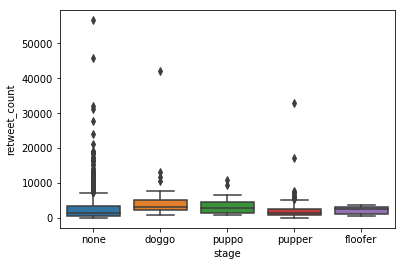

In [54]:
# Insight #3 - None seems to have way more retweet_count and favorite_count outliers than the other stages so it might
# be good to revisit the None stage in future analyses to see if you can recode it to another stage
sn.boxplot(data = df, x='stage', y='retweet_count');

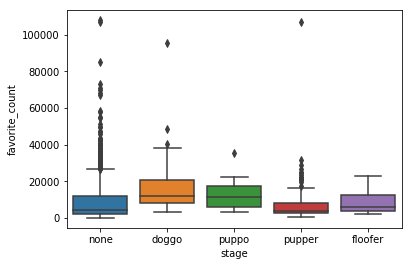

In [55]:
sn.boxplot(data = df, x='stage', y='favorite_count');

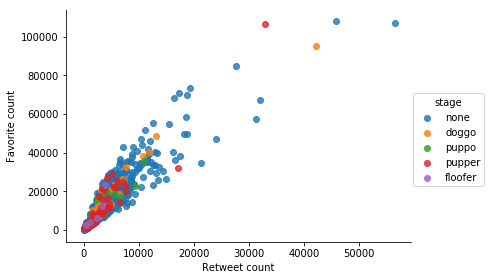

In [56]:
# Visualization - Favorite Count compared to Retweet by Stage
g = sn.FacetGrid(data=df, hue='stage', size=4, aspect=1.5)
g = g.map(sn.regplot, 'retweet_count', 'favorite_count', x_jitter = 0.04, fit_reg = False);
g.add_legend();
plt.xlabel('Retweet count')
plt.ylabel('Favorite count');

<a id='reporting'></a>

### Reporting on

- see `wrangle_report.pdf` a 300-600 word written report that briefly describes my wrangling efforts.
- see `act_report.pdf` which communicates the insights and displays the visualization(s) produced from my wrangled data.